In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
#Reading the required rows
nRowsRead = 1000 # specify 'None' if want to read whole file
df = pd.read_csv('StudentsPerformance.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'StudentsPerformance.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


In [ ]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
passmark = 40

In [ ]:
print (df.shape)

(1000, 8)


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

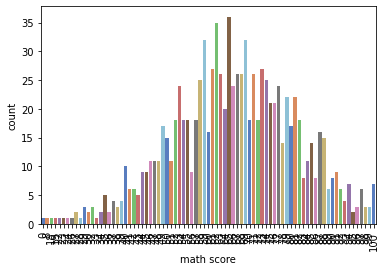

In [ ]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [ ]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

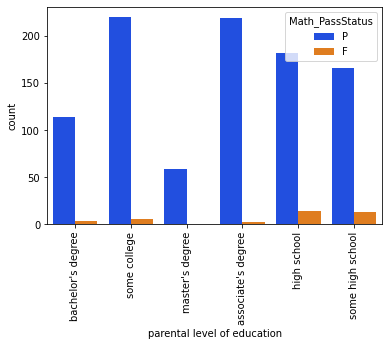

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

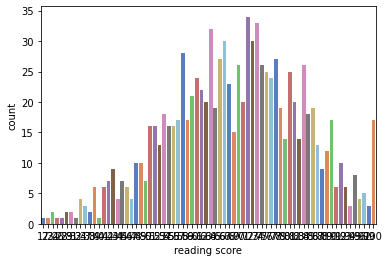

In [ ]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

In [ ]:
#How many studends passed in reading ?

How many studends passed in reading ?

In [ ]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Let us explore writing score

In [ ]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Students who passed writing ?

In [ ]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

plot graph to show students who passed writing

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Students who passed in all the subjects

In [ ]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)
df.OverAll_PassStatus.value_counts()

Plot graph to show students who passed all subjects

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90)

 Percentage of marks

In [ ]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3
df

In [ ]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

Let us assign the grades
Grading
above 80 = A Grade
70 to 80 = B Grade
60 to 70 = C Grade
50 to 60 = D Grade
40 to 50 = E Grade
below 40 = F Grade ( means Fail )


In [ ]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

 Plot the grades obtained in a order

In [ ]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Aim
To understand the influence of various factors like economic, personal and social on the students performance

1. How to imporve the students performance in each test ?
2. What are the major factors influencing the test scores ?
3. Effectiveness of test preparation course?